Existen muchas librerías en Python que permiten implementar redes neuronales artificiales. En este tutorial, vamos a utilizar la librería `scikit-learn`, `keras` y `tensorflow` para implementar una red neuronal artificial para resolver problemas de clasificación y regresión.

## `scikit-learn`

`scikit-learn` es una librería de Python que permite implementar algoritmos de aprendizaje supervisado y no supervisado. En particular, `scikit-learn` incluye una clase llamada `MLPClassifier` que permite implementar redes neuronales artificiales para problemas de clasificación.

### Ejemplo de clasificación

En este ejemplo, vamos a utilizar la base de datos `iris` para entrenar una red neuronal artificial que permita clasificar las flores en tres categorías: `setosa`, `versicolor` y `virginica`.


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Cargar la base de datos iris
iris = load_iris()
X = iris.data
y = iris.target

print(iris.target_names)
print(iris.feature_names)
print(X.shape)
print(y.shape)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4)
(150,)


Implementamos la red neuronal artificial y la entrenamos con la base de datos `iris`.


In [2]:
# Dividir la base de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear la red neuronal artificial
clf = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42, 
                    activation='relu', solver='sgd', learning_rate='adaptive', 
                    learning_rate_init=0.001)

# Entrenar la red neuronal artificial
clf.fit(X_train, y_train)

# Evaluar la red neuronal artificial
score = clf.score(X_test, y_test)
print(score)

0.9333333333333333


La clase `MLPClassifier` tiene varios parámetros que permiten configurar la red neuronal artificial. En este ejemplo, utilizamos los siguientes parámetros:

- `hidden_layer_sizes`: Número de neuronas en cada capa oculta.
- `max_iter`: Número máximo de iteraciones para entrenar la red neuronal artificial.
- `random_state`: Semilla para la generación de números aleatorios.
- `solver`: Algoritmo de optimización para entrenar la red neuronal artificial.
- `activation`: Función de activación para las neuronas en las capas ocultas.
- `learning_rate`: Tasa de aprendizaje para actualizar los pesos de la red neuronal artificial.
- `learning_rate_init`: Tasa de aprendizaje inicial para actualizar los pesos de la red neuronal artificial.

El método `score` permite evaluar la precisión de la red neuronal artificial en la base de datos de prueba.

Podemos obtener las predicciones de la red neuronal artificial para la base de datos de prueba.


In [3]:
# Obtener las predicciones de la red neuronal artificial
y_pred = clf.predict(X_test)
print(y_pred)

[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 1 2 2 2 0 0]


Para evaluar la red neuronal artificial, podemos calcular la matriz de confusión.


In [4]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  0  0]
 [ 0  8  1]
 [ 0  1 10]]


Podemos visualizar la matriz de confusión utilizando la librería `seaborn`.


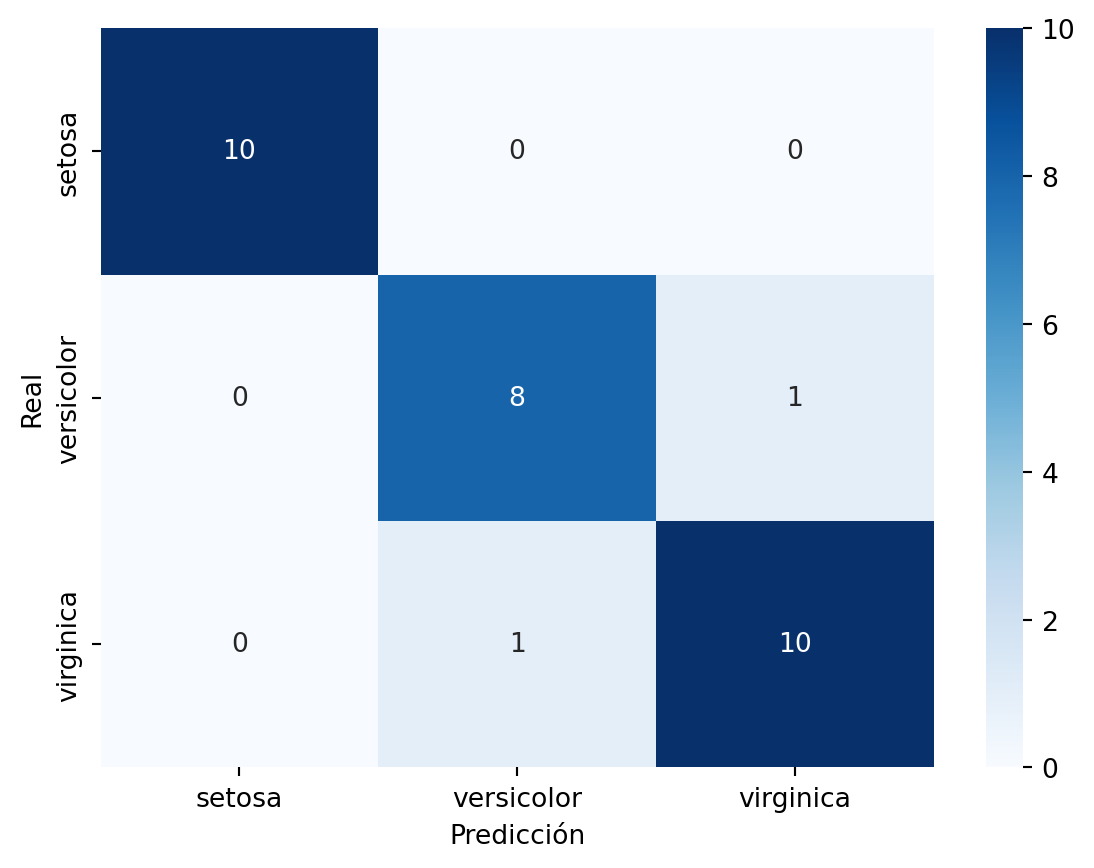

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names,
            cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

Con este mapa de color podemos visualizar la matriz de confusión. Las filas representan las categorías reales y las columnas representan las categorías predichas. Los valores en la diagonal principal representan las predicciones correctas y esperamos que un buen modelo tenga valores altos en la diagonal principal.

POdemos usar el área bajo la curva ROC para evaluar la red neuronal artificial.


In [6]:
from sklearn.metrics import roc_auc_score

# Calcular el área bajo la curva ROC
y_prob = clf.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print(roc_auc)

0.9966414352379265


Aquí el parámetro `multi_class` se refiere a la estrategia de codificación de clases. En este caso, utilizamos `ovr` que significa "one-vs-rest", que evalúa cada clase en comparación con el resto de las clases y es sensible a datos desequilibrados.

Entre más cercano a 1 sea el valor del área bajo la curva ROC, mejor será el modelo, ya que significa que el modelo es capaz de distinguir entre las diferentes clases.

## `PyTorch`

`PyTorch` es una librería de Python que permite implementar redes neuronales artificiales de manera eficiente. En particular, `PyTorch` incluye una clase llamada `nn.Module` que permite definir la arquitectura de la red neuronal artificial.

### Uso básico de PyTorch

Para utilizar `PyTorch`, primero debemos instalar la librería, el comando que recomienda la página de `PyTorch` es el siguiente para Windows y sin el uso de GPU.


```{bash}
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
```


#### Tensores

En `PyTorch`, los datos se almacenan en tensores, que son arreglos multidimensionales similares a los arreglos de `NumPy`. Podemos crear tensores en `PyTorch` de la siguiente manera.


In [7]:
import torch

# Crear un tensor de ceros
x = torch.zeros(2, 3)

print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


Podemos crear tensores a partir de arreglos de `NumPy`.


In [8]:
import numpy as np

# Crear un arreglo de NumPy
arr = np.array([[1, 2, 3], [4, 5, 6]])

# Crear un tensor de PyTorch a partir de un arreglo de NumPy
x = torch.tensor(arr)

print(x)

tensor([[1, 2, 3],
        [4, 5, 6]])


Los tensores pueden ser de diferentes tipos de datos, como `float32`, `int64`, `bool`, etc.


In [9]:
# Crear un tensor de enteros
x = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.int64)

print(x)

# Crear un tensor de booleanos
x = torch.tensor([[True, False], [False, True]])

print(x)

# Crear un tensor de punto flotante
x = torch.tensor([[1.0, 2.0], [3.0, 4.0]], dtype=torch.float32)

print(x)

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[ True, False],
        [False,  True]])
tensor([[1., 2.],
        [3., 4.]])


Podemos tener tensores de cualquier dimensión.


In [10]:
# Crear un tensor de 3 dimensiones
x = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

print(x)

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])


#### Operaciones con tensores

Podemos realizar operaciones matemáticas con tensores en `PyTorch`.


In [11]:
# Crear dos tensores
x = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
y = torch.tensor([[5, 6], [7, 8]], dtype=torch.float32)

# Sumar los tensores
z = x + y

print(z)

# Multiplicar los tensores
z = x * y
print(z)

# Multiplicar un tensor por un escalar
z = 2 * x
print(z)

# Calcular la transpuesta de un tensor
z = x.t()
print(z)

# Calcular el producto punto de dos tensores
z = torch.dot(x.view(-1), y.view(-1))
print(z)

# Calcular el producto matricial de dos tensores
z = torch.mm(x, y)

print(z)

# Calcular la inversa de un tensor
z = torch.inverse(x)

print(z)

# Calcular la norma de un tensor
z = torch.norm(x)

print(z)

# Calcular la media de un tensor
z = torch.mean(x)

print(z)

# Calcular la desviación estándar de un tensor
z = torch.std(x)

print(z)

tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[ 5., 12.],
        [21., 32.]])
tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 3.],
        [2., 4.]])
tensor(70.)
tensor([[19., 22.],
        [43., 50.]])
tensor([[-2.0000,  1.0000],
        [ 1.5000, -0.5000]])
tensor(5.4772)
tensor(2.5000)
tensor(1.2910)


#### Métodos de tensores

Los tensores en `PyTorch` tienen varios métodos útiles.


In [12]:
# Crear un tensor de 3 dimensiones
x = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

# Obtener la forma del tensor
print(f"Shape: {x.shape}")

# Obtener el número de elementos en el tensor
print(f"Size: {x.size()}")

# Obtener el tipo de datos del tensor
print(f"Data type: {x.dtype}")

# Obtener el dispositivo en el que se almacena el tensor
print(f"Device: {x.device}")

# Obtener el número de dimensiones del tensor
print(f"Number of dimensions: {x.dim()}")

# Obtener el número de elementos en una dimensión específica
print(f"Number of elements in the first dimension: {x.size(0)}")

# Obtener el elemento en una posición específica
print(f"Element at position (0, 1, 1): {x[0, 1, 1]}")

# Obtener un subtensor
print(f"Subtensor: {x[0, :, :]}")

# Cambiar la forma del tensor
print(f"Reshape: {x.view(2, 4)}")

# Aplanar el tensor
print(f"Flatten: {x.view(-1)}")

# Concatenar tensores
y = torch.tensor([[[9, 10], [11, 12]], [[13, 14], [15, 16]]])
z = torch.cat((x, y), dim=0)

print(z)

# Dividir un tensor
z1, z2 = torch.chunk(z, 2, dim=0)

print(f"z1: {z1}")
print(f"z2: {z2}")

# Calcular la suma acumulada de un tensor
z = torch.cumsum(x, dim=0)

print(f"Cumulative sum: {z}")

Shape: torch.Size([2, 2, 2])
Size: torch.Size([2, 2, 2])
Data type: torch.int64
Device: cpu
Number of dimensions: 3
Number of elements in the first dimension: 2
Element at position (0, 1, 1): 4
Subtensor: tensor([[1, 2],
        [3, 4]])
Reshape: tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
Flatten: tensor([1, 2, 3, 4, 5, 6, 7, 8])
tensor([[[ 1,  2],
         [ 3,  4]],

        [[ 5,  6],
         [ 7,  8]],

        [[ 9, 10],
         [11, 12]],

        [[13, 14],
         [15, 16]]])
z1: tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
z2: tensor([[[ 9, 10],
         [11, 12]],

        [[13, 14],
         [15, 16]]])
Cumulative sum: tensor([[[ 1,  2],
         [ 3,  4]],

        [[ 6,  8],
         [10, 12]]])


### Estructura de una red neuronal artificial en PyTorch

Veamos las distintas partes de una red neuronal artificial en `PyTorch`.

#### Ejemplo de clasificación

En este ejemplo, vamos a utilizar la base de datos `iris` para entrenar una red neuronal artificial que permita clasificar las flores en tres categorías: `setosa`, `versicolor` y `virginica`.


In [13]:
import torch
import torch.nn as nn

# Crear la red neuronal artificial

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(4, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 3)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.softmax(x)
        return x

model = MLP()

print(model)

MLP(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=3, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)


Para crear la red neuronal artificial, definimos una clase llamada `MLP` que hereda de `nn.Module`. En el método `__init__`, definimos las capas de la red neuronal artificial y las funciones de activación. En el método `forward`, definimos la arquitectura de la red neuronal artificial.

Dentro del método `__init__`, usamos la función `super` para inicializar la clase base `nn.Module`. Luego, definimos las capas de la red neuronal artificial utilizando la clase `nn.Linear` que representa una capa de neuronas completamente conectada. En este caso, definimos tres capas de neuronas con 4, 10 y 3 neuronas respectivamente.

También definimos las funciones de activación `nn.ReLU` y `nn.Softmax` para las capas ocultas y de salida respectivamente. La función de activación `ReLU` se utiliza para introducir no linealidades en la red neuronal artificial, mientras que la función de activación `Softmax` se utiliza para obtener probabilidades de las clases y recive como argumento la dimensión en la que se calcula el softmax.

En el método `forward`, definimos la arquitectura de la red neuronal artificial. Primero aplicamos la capa `fc1` seguida de la función de activación `ReLU`. Luego aplicamos la capa `fc2` seguida de la función de activación `ReLU`. Finalmente aplicamos la capa `fc3` seguida de la función de activación `Softmax`.

La función `Linear` aplicará una transformación lineal a los datos de entrada: $y = xA^T + b$, donde $x$ es la entrada, $A$ es la matriz de pesos y $b$ es el vector de sesgos.

Es importante que las neuronas entre capas tengan la misma cantidad de neuronas que la capa anterior y la capa siguiente. En este caso, la capa de entrada tiene 4 neuronas, la capa oculta tiene 10 neuronas y la capa de salida tiene 3 neuronas.

Vamos a usar la base de datos `iris` para ver que resultados obtenemos.


In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Cargar la base de datos iris
iris = load_iris()
X = iris.data
y = iris.target

model = MLP()

# Convertir los datos a tensores de PyTorch
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

print(X.shape)
print(y.shape)

# Obtener las predicciones de la red neuronal artificial
y_pred = model(X)

print(y_pred)

torch.Size([150, 4])
torch.Size([150])
tensor([[0.3815, 0.2707, 0.3478],
        [0.3707, 0.2763, 0.3529],
        [0.3767, 0.2748, 0.3485],
        [0.3761, 0.2767, 0.3472],
        [0.3848, 0.2700, 0.3452],
        [0.3857, 0.2675, 0.3468],
        [0.3805, 0.2740, 0.3455],
        [0.3804, 0.2723, 0.3473],
        [0.3722, 0.2792, 0.3486],
        [0.3762, 0.2751, 0.3487],
        [0.3846, 0.2679, 0.3474],
        [0.3825, 0.2732, 0.3442],
        [0.3740, 0.2762, 0.3498],
        [0.3763, 0.2772, 0.3465],
        [0.3872, 0.2628, 0.3499],
        [0.3947, 0.2610, 0.3442],
        [0.3835, 0.2665, 0.3500],
        [0.3790, 0.2712, 0.3498],
        [0.3833, 0.2669, 0.3498],
        [0.3871, 0.2685, 0.3445],
        [0.3782, 0.2714, 0.3503],
        [0.3820, 0.2700, 0.3479],
        [0.3859, 0.2704, 0.3438],
        [0.3707, 0.2750, 0.3542],
        [0.3841, 0.2740, 0.3418],
        [0.3710, 0.2765, 0.3525],
        [0.3759, 0.2736, 0.3505],
        [0.3813, 0.2706, 0.3481],
        [

Que nos regresa un tensor con las probabilidades de cada clase para cada observación. Para obtener la clase predicha, podemos usar la función `argmax` de PyTorch.


In [15]:
# Obtener la clase predicha
y_pred = torch.argmax(y_pred, dim=1)

print(y_pred)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
        0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])


#### Funciones de activación en PyTorch

En `PyTorch`, las funciones de activación se pueden utilizar como capas en una red neuronal artificial. Las funciones de activación más comunes son `ReLU`, `Sigmoid` y `Softmax`.


In [16]:
import torch

# Crear un tensor de entrada
x = torch.tensor([[1.0, -1.0], [-1.0, 1.0]])

# Función de activación ReLU
relu = torch.nn.ReLU()
y = relu(x)

print(f"ReLU: {y}")

# Función de activación Sigmoid
sigmoid = torch.nn.Sigmoid()
y = sigmoid(x)

print(f"Sigmoid: {y}")

# Función de activación Softmax
softmax = torch.nn.Softmax(dim=1)
y = softmax(x)

print(f"Softmax: {y}")

# Función de activación Tanh
tanh = torch.nn.Tanh()
y = tanh(x)

print(f"Tanh: {y}")

# Función de activación LeakyReLU
leaky_relu = torch.nn.LeakyReLU(negative_slope=0.01)
y = leaky_relu(x)

print(f"LeakyReLU: {y}")

ReLU: tensor([[1., 0.],
        [0., 1.]])
Sigmoid: tensor([[0.7311, 0.2689],
        [0.2689, 0.7311]])
Softmax: tensor([[0.8808, 0.1192],
        [0.1192, 0.8808]])
Tanh: tensor([[ 0.7616, -0.7616],
        [-0.7616,  0.7616]])
LeakyReLU: tensor([[ 1.0000, -0.0100],
        [-0.0100,  1.0000]])


### Entrenamiento de la red neuronal

Para entrenar la red neuronal artificial, primero debemos definir una función de pérdida y un optimizador.

#### Función de pérdida

La función de pérdida mide la diferencia entre las predicciones de la red neuronal artificial y las etiquetas reales. Existen diversas funciones de pérdida para problemas de clasificación y regresión.

- Funciones de pérdida para problemas de clasificación:
    - `nn.CrossEntropyLoss`: Utilizada para problemas de clasificación multiclase.
    - `nn.BCELoss`: Utilizada para problemas de clasificación binaria.
    - `nn.NLLLoss`: Utilizada para problemas de clasificación multiclase con salida logarítmica.
- Funciones de pérdida para problemas de regresión:
    - `nn.MSELoss`: Utilizada para problemas de regresión de mínimos cuadrados.
    - `nn.L1Loss`: Utilizada para problemas de regresión de mínimos absolutos.
    - `nn.SmoothL1Loss`: Utilizada para problemas de regresión de mínimos suavizados.


In [17]:
import torch.nn as nn

y_pred = torch.tensor([[0.1, 0.2, 0.7], [0.8, 0.1, 0.1], [0.2, 0.6, 0.2]])
y = torch.tensor([2, 0, 1])

# Crear la función de pérdida
criterion = nn.CrossEntropyLoss()

# Calcular la pérdida
loss = criterion(y_pred, y)

print(loss)

tensor(0.7694)


Nos regresa el error de la red neuronal. Para minimizar la función de pérdida, utilizamos un optimizador.

#### Optimizador

El optimizador ajusta los pesos de la red neuronal artificial para minimizar la función de pérdida. Existen diversos optimizadores que se pueden utilizar para entrenar una red neuronal artificial.

- Optimizadores basados en gradiente:
    - `torch.optim.SGD`: Descenso de gradiente estocástico.
    - `torch.optim.Adam`: Algoritmo de optimización basado en el método de Adam.
    - `torch.optim.RMSprop`: Algoritmo de optimización basado en el método de RMSprop.

Cadad optimizador tiene sus propios hiperparámetros que se pueden ajustar para mejorar el rendimiento de la red neuronal artificial.


In [18]:
import torch.optim as optim

# Crear el optimizador
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Realizar la retropropagación
optimizer.zero_grad()

# loss.backward()

# Actualizar los pesos
optimizer.step()

En este caso, utilizamos el optimizador `SGD` con una tasa de aprendizaje de 0.01. Primero, llamamos al método `zero_grad` para restablecer los gradientes de los pesos de la red neuronal artificial. Luego, llamamos al método `backward` para calcular los gradientes de la función de pérdida con respecto a los pesos. Finalmente, llamamos al método `step` para actualizar los pesos de la red neuronal artificial utilizando el algoritmo de optimización.

Estos pasos se repiten varias veces para entrenar la red neuronal artificial en un conjunto de datos.

### Preparación de los datos

Para entrenar una red neuronal artificial, primero debemos preparar los datos en tensores de PyTorch.


In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Cargar la base de datos iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir la base de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1014)

# Convertir los datos a tensores de PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([120, 4])
torch.Size([30, 4])
torch.Size([120])
torch.Size([30])


Los datos tipo `torch.long` es equivalente a `int64` en `NumPy` y se utiliza para representar las etiquetas de las clases. 


### Red Neuronal con PyTorch

Vamos a definir una red neuronal de 2 capas ocultas con 4 neuronas cada capa y una capa de salida con 3 neuronas.


In [20]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(4, 4)
        self.fc2 = nn.Linear(4, 4)
        self.fc3 = nn.Linear(4, 3)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.softmax(x)
        return x
    
    def predict(self, x):
        with torch.no_grad():
            y = self.forward(x)
            return torch.argmax(y, dim=1)
    
model = NeuralNetwork()

print(model)

NeuralNetwork(
  (fc1): Linear(in_features=4, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=4, bias=True)
  (fc3): Linear(in_features=4, out_features=3, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)


Ahora creemos una función para entrenar la red neuronal.


In [21]:
def train(model, X_train, y_train, criterion, optimizer, epochs):
    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")

Ahora vamos a entrenar la red neuronal.


In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

train(model, X_train, y_train, criterion, optimizer, epochs=1000)

Epoch 50/1000, Loss: 1.0754790306091309
Epoch 100/1000, Loss: 1.07102370262146
Epoch 150/1000, Loss: 1.067678689956665


Epoch 200/1000, Loss: 1.0643763542175293


Epoch 250/1000, Loss: 1.0608757734298706


Epoch 300/1000, Loss: 1.0570424795150757


Epoch 350/1000, Loss: 1.052795648574829


Epoch 400/1000, Loss: 1.0484215021133423


Epoch 450/1000, Loss: 1.043760895729065
Epoch 500/1000, Loss: 1.0385349988937378


Epoch 550/1000, Loss: 1.0325710773468018
Epoch 600/1000, Loss: 1.0256762504577637
Epoch 650/1000, Loss: 1.0176128149032593


Epoch 700/1000, Loss: 1.0081112384796143


Epoch 750/1000, Loss: 0.9968506693840027


Epoch 800/1000, Loss: 0.9835156798362732


Epoch 850/1000, Loss: 0.9678962826728821


Epoch 900/1000, Loss: 0.9499657154083252


Epoch 950/1000, Loss: 0.9237939119338989
Epoch 1000/1000, Loss: 0.9007318615913391


Finalmente, vamos a evaluar la red neuronal en la base de datos de prueba.


In [23]:
y_pred = model.predict(X_test)

print(y_pred)

tensor([2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2,
        0, 2, 2, 0, 2, 2])


Calculamos la precisión de la red neuronal.


In [24]:
accuracy = torch.sum(y_pred == y_test).item() / len(y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.5


Como vemos, la red tiene un precisión muy baja, esto se debe a que la red neuronal es muy compleja para el problema que estamos tratando de resolver. Dismunuyamos la complejidad de la red neuronal.


In [25]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(4, 2)
        self.fc2 = nn.Linear(2, 3)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.softmax(x)
        return x
    
    def predict(self, x):
        with torch.no_grad():
            y = self.forward(x)
            return torch.argmax(y, dim=1)

model = NeuralNetwork()

print(model)

NeuralNetwork(
  (fc1): Linear(in_features=4, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=3, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)


Entrenamos la red neuronal.


In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

train(model, X_train, y_train, criterion, optimizer, epochs=1500)

Epoch 50/1500, Loss: 1.0786900520324707
Epoch 100/1500, Loss: 1.0306339263916016


Epoch 150/1500, Loss: 0.9199546575546265


Epoch 200/1500, Loss: 0.8805767297744751
Epoch 250/1500, Loss: 0.8552428483963013


Epoch 300/1500, Loss: 0.8381394147872925


Epoch 350/1500, Loss: 0.8256418704986572


Epoch 400/1500, Loss: 0.8157903552055359


Epoch 450/1500, Loss: 0.8073647022247314
Epoch 500/1500, Loss: 0.7996431589126587


Epoch 550/1500, Loss: 0.792230486869812


Epoch 600/1500, Loss: 0.7848939299583435
Epoch 650/1500, Loss: 0.7775012850761414


Epoch 700/1500, Loss: 0.7699931859970093
Epoch 750/1500, Loss: 0.7623674273490906


Epoch 800/1500, Loss: 0.7546666860580444


Epoch 850/1500, Loss: 0.7469660043716431


Epoch 900/1500, Loss: 0.7393587231636047


Epoch 950/1500, Loss: 0.7319421172142029


Epoch 1000/1500, Loss: 0.7248038053512573


Epoch 1050/1500, Loss: 0.7180129289627075
Epoch 1100/1500, Loss: 0.711614727973938


Epoch 1150/1500, Loss: 0.7056317925453186


Epoch 1200/1500, Loss: 0.7000667452812195
Epoch 1250/1500, Loss: 0.6949079632759094


Epoch 1300/1500, Loss: 0.6901333332061768
Epoch 1350/1500, Loss: 0.6857159733772278


Epoch 1400/1500, Loss: 0.6816268563270569


Epoch 1450/1500, Loss: 0.6778366565704346


Epoch 1500/1500, Loss: 0.6743176579475403


Evaluamos la red neuronal.


In [27]:
y_pred = model.predict(X_test)

accuracy = torch.sum(y_pred == y_test).item() / len(y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9666666666666667


Esto mejora la precisión de la red neuronal. Podemos visualizar la matriz de confusión.


<Axes: >

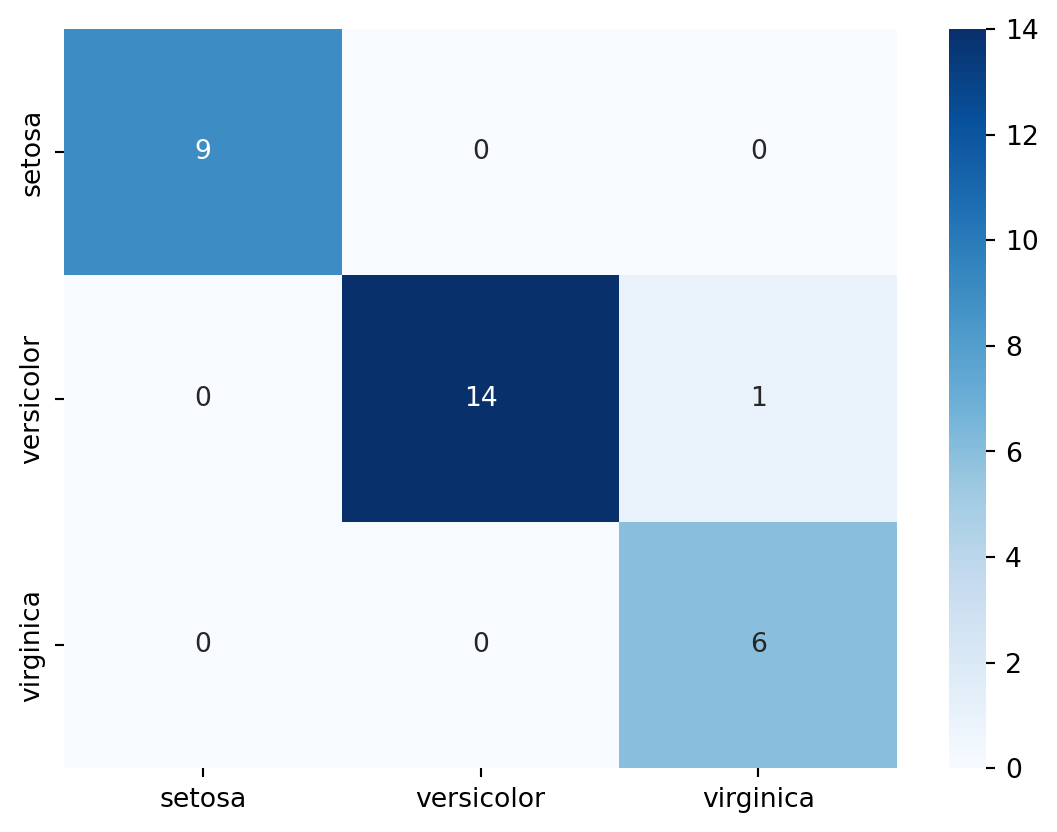

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names,
            cmap='Blues')

# Aspectos importantes

La inicialización de los pesos de la red neuronal puede afectar significativamente el rendimiento del modelo. En general, es importante inicializar los pesos de la red neuronal de manera que no se saturen las neuronas y se evite el problema del desvanecimiento o explosión del gradiente. Existen diversas técnicas de inicialización de pesos que se pueden utilizar para mejorar el rendimiento de la red neuronal artificial. Una de ellas es la **inicialización de Xavier**, que ajusta los pesos de la red neuronal de manera que la varianza de las salidas de las neuronas sea igual a la varianza de las entradas de las neuronas.

Otro aspecto importante es la **regularización de la red neuronal**, que se utiliza para evitar el sobreajuste de la red neuronal a los datos de entrenamiento. Existen diversas técnicas de regularización que se pueden utilizar para mejorar el rendimiento de la red neuronal artificial. Una de ellas es la **regularización L2**, que penaliza los pesos de la red neuronal para evitar que se vuelvan demasiado grandes.

Además, es importante ajustar los hiperparámetros de la red neuronal, como el número de capas ocultas, el número de neuronas en cada capa oculta, la tasa de aprendizaje, el número de épocas de entrenamiento, etc. para mejorar el rendimiento de la red neuronal artificial.

Es importante la escala de los datos, ya que si los datos no están normalizados, la red neuronal puede tener dificultades para converger. Por lo tanto, es importante normalizar los datos antes de entrenar la red neuronal artificial.

Existen diversas formas de normalizar los datos, como la normalización min-max, la normalización z-score, la normalización por rango, etc. En python, podemos utilizar la librería `scikit-learn` para normalizar los datos.


In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Normalizar los datos utilizando la normalización min-max
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

df = pd.DataFrame(X_train, columns=iris.feature_names)
print(df.head())

# Normalizar los datos utilizando la normalización z-score
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

df = pd.DataFrame(X_train, columns=iris.feature_names)
print(df.head())

# Normalizar los datos utilizando la normalización por rango
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

df = pd.DataFrame(X_train, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.250000          0.590909           0.084746          0.041667
1           0.583333          0.454545           0.593220          0.583333
2           0.472222          0.545455           0.593220          0.625000
3           0.500000          0.318182           0.627119          0.541667
4           0.388889          0.363636           0.542373          0.458333
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.813744          1.000766          -1.257121         -1.298710
1           0.611793          0.288759           0.384982          0.359218
2           0.136614          0.763431           0.384982          0.486751
3           0.255408         -0.423249           0.494455          0.231685
4          -0.219770         -0.185913           0.220772         -0.023381
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -

Es importante realizar este proceso **después** de haber dividido los datos en entrenamiento y prueba, para evitar el sesgo en la evaluación del modelo, ya que si se realiza antes de dividir los datos, se estaría utilizando información de la base de datos de prueba para normalizar los datos de entrenamiento y dar de forma indirecta información de la base de datos de prueba a la red neuronal.

# `TensorFlow`

`TensorFlow` es una librería de Python que permite implementar redes neuronales artificiales de manera eficiente. En particular, `TensorFlow` incluye una clase llamada `tf.keras.Sequential` que permite definir la arquitectura de la red neuronal artificial.

### Uso básico de TensorFlow

Para utilizar `TensorFlow`, primero debemos instalar la librería.


```{bash}
!pip install tensorflow
```


`Tensorflow` se basa igualmente en el uso de tensores para realizar operaciones matemáticas.


In [30]:
import tensorflow as tf

# Crear un tensor de ceros
x = tf.zeros((2, 3))

print(x)

tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)


Podemos realizar operaciones matemáticas con tensores en `TensorFlow`.


In [31]:
# Crear dos tensores
x = tf.constant([[1, 2], [3, 4]], dtype=tf.float32)
y = tf.constant([[5, 6], [7, 8]], dtype=tf.float32)

# Sumar los tensores
z = x + y

print(z)

# Multiplicar los tensores
z = x * y

print(z)

# Multiplicar un tensor por un escalar
z = 2 * x

print(z)

# Calcular la transpuesta de un tensor
z = tf.transpose(x)

tf.Tensor(
[[ 6.  8.]
 [10. 12.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 5. 12.]
 [21. 32.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 4.]
 [6. 8.]], shape=(2, 2), dtype=float32)


Todo las operaciones que se pueden realizar en `PyTorch` se pueden realizar en `TensorFlow`.

### Estructura de una red neuronal artificial en TensorFlow

Veamos las distintas partes de una red neuronal artificial en `TensorFlow`.

#### Ejemplo de clasificación

En este ejemplo, vamos a utilizar la base de datos `iris` para entrenar una red neuronal artificial que permita clasificar las flores en tres categorías: `setosa`, `versicolor` y `virginica`.


In [32]:
import tensorflow as tf

# Crear la red neuronal artificial
model = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

Con `TensorFlow` se puede definir la red neuronal de manera más sencilla que con `PyTorch`. En este caso, utilizamos la clase `tf.keras.Sequential` para definir la arquitectura de la red neuronal artificial. La clase `tf.keras.layers.Dense` representa una capa de neuronas completamente conectada. En este caso, definimos tres capas de neuronas con 10, 10 y 3 neuronas respectivamente. La función `tf.keras.Input` define la capa de entrada de la red neuronal.

Vamos a entrenar la red neuronal.


In [33]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Cargar la base de datos iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir la base de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1014)

# Convertir los datos a tensores de TensorFlow
X_train = tf.constant(X_train, dtype=tf.float32)
X_test = tf.constant(X_test, dtype=tf.float32)

y_train = tf.constant(y_train, dtype=tf.int64)
y_test = tf.constant(y_test, dtype=tf.int64)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

# Compilar la red neuronal
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar la red neuronal
model.fit(X_train, y_train, epochs=1000, verbose=0)

# Evaluar la red neuronal
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Loss: {loss}, Accuracy: {accuracy}")

(120, 4)
(30, 4)
(120,)
(30,)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 1.0000 - loss: 0.0373

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 1.0000 - loss: 0.0373


Loss: 0.03730132058262825, Accuracy: 1.0


Con el método `compile` se compila la red neuronal con un optimizador, una función de pérdida y métricas de evaluación. En este caso, utilizamos el optimizador `sgd` (descenso de gradiente estocástico), la función de pérdida `sparse_categorical_crossentropy` y la métrica `accuracy` para evaluar la precisión de la red neuronal.

Con el método `fit` se entrena la red neuronal con los datos de entrenamiento. En este caso, utilizamos 1000 épocas de entrenamiento. El argumento `verbose=0` indica que no se mostrará información sobre el entrenamiento, para mostrar la información se puede cambiar a `verbose=1`.

Con el método `evaluate` se evalúa la red neuronal con los datos de prueba. El método `evaluate` devuelve la pérdida y la precisión de la red neuronal en los datos de prueba. 

Podemos obtener las predicciones de la red neuronal para la base de datos de prueba.


In [34]:
y_pred = model.predict(X_test)

print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


[[9.3780188e-03 9.9053556e-01 8.6380802e-05]
 [2.6691245e-05 6.1251414e-01 3.8745919e-01]
 [2.8749557e-07 5.9596896e-02 9.4040269e-01]
 [9.9821705e-01 1.7829464e-03 7.0882692e-12]
 [3.1476901e-04 9.9696678e-01 2.7184207e-03]
 [9.9806172e-01 1.9382917e-03 4.5069222e-12]
 [4.7594633e-05 9.9566221e-01 4.2900806e-03]
 [9.9946874e-01 5.3111481e-04 5.8261650e-14]
 [7.6720468e-04 9.9874258e-01 4.9011409e-04]
 [4.5947208e-06 3.0641466e-01 6.9358081e-01]
 [9.9916506e-01 8.3498686e-04 3.6297191e-13]
 [6.1792984e-05 9.9003565e-01 9.9024186e-03]
 [9.9943411e-01 5.6587165e-04 6.9331653e-14]
 [1.2681982e-04 9.9869889e-01 1.1743259e-03]
 [1.3101969e-07 6.3623767e-03 9.9363756e-01]
 [1.1187630e-03 9.9319637e-01 5.6849075e-03]
 [9.9854863e-01 1.4513362e-03 3.3198364e-12]
 [9.9968213e-01 3.1789864e-04 6.2396470e-15]
 [2.2063234e-04 9.5556730e-01 4.4211969e-02]
 [2.8410594e-03 9.9692291e-01 2.3596971e-04]
 [2.3421185e-08 3.8140393e-03 9.9618596e-01]
 [2.8064492e-04 9.9876738e-01 9.5207797e-04]
 [2.145102

Para obtener la clase predicha, podemos usar la función `argmax` de `NumPy`.


In [35]:
y_pred = np.argmax(y_pred, axis=1)

print(y_pred)

[1 1 2 0 1 0 1 0 1 2 0 1 0 1 2 1 0 0 1 1 2 1 2 1 0 1 1 0 1 2]


Podemos visualizar la matriz de confusión.


<Axes: >

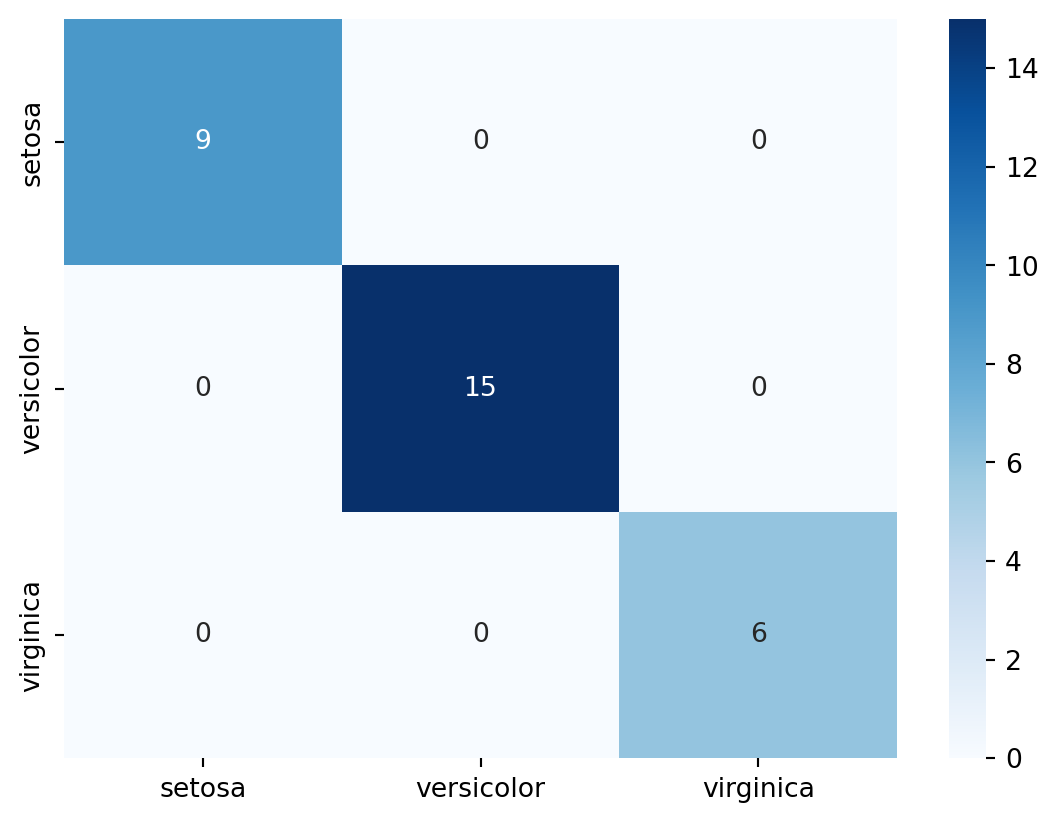

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names,
            cmap='Blues')

# Salvando y cargando modelos

En `PyTorch` se pueden guardar y cargar modelos utilizando el método `save` y `load`.


In [37]:
# Guardar el modelo
#torch.save(model.state_dict(), 'model.pth')

# Cargar el modelo
#model.load_state_dict(torch.load('model.pth'))

En `TensorFlow` se pueden guardar y cargar modelos utilizando el método `save` y `load`.


In [38]:
# Guardar el modelo
model.save('model.keras')

# Cargar el modelo
#model = keras.models.load_model('path/to/location.keras')

Esto sirve para guardar el modelo y poder utilizarlo en otro momento sin tener que volver a entrenarlo.

# Conclusiones

En este tutorial, hemos visto cómo implementar redes neuronales artificiales en Python utilizando las librerías `scikit-learn`, `PyTorch` y `TensorFlow`. Hemos visto cómo cargar una base de datos, dividirla en entrenamiento y prueba, definir la arquitectura de la red neuronal, entrenar la red neuronal, evaluar la red neuronal y visualizar la matriz de confusión. También hemos visto cómo normalizar los datos y ajustar los hiperparámetros de la red neuronal para mejorar el rendimiento del modelo.